# Ошибка игрока

«Ошибка игрока» представляет собой ошибочное понимание случайности событий, что приводит к убеждению в том, что если в повторяющихся независимых исходах случайного процесса наблюдалось отклонение от ожидаемого поведения, тогда будущие отклонения в противоположном направлении становятся более вероятны.  

Однако такое умозаключение противоречит теории вероятностей, изучающей случайные события и случайные величины. Согласно этой теории, необходимо рассматривать каждое событие по отдельности, как статистически независимое от предыдущих, а не в цепи событий.  

Также в теории вероятности описывается **закон больших чисел**, формулирующий результат выполнения одного и того же эксперимента много раз. Согласно этому закону, среднее значение конечной выборки из фиксированного распределения близко к математическому ожиданию этого распределения.


## Пример с подбрасыванием монеты

В случае с подбрасыванием монеты много раз вполне может произойти ситуация, когда выпадет 9 «решек» подряд. Если монета «нормальная» («правильная»), то для многих людей кажется очевидным, что при следующем броске вероятность выпадения «орла» будет больше: сложно поверить, что «решка» может выпасть десятый раз подряд.  

Тем не менее, такой вывод является ошибочным. Вероятность выпадения следующего орла или решки по-прежнему остаётся $ \frac{1}{2} $.  

Эта логика неприменима к случайному вытаскиванию карт из колоды, поскольку количество карт в ней конечно. Чем больше было вытащено, например, чёрных карт, тем больше вероятность, что следующая будет красная.


## Вероятность последовательных исходов

Нужно, однако, разграничивать понятия: вероятность выпадения «орла» или «решки» в каждом конкретном случае и вероятность выпадения «решки» $n$ раз подряд (например, два раза подряд или десять раз подряд).  

Последняя будет равна:  

$$
\left(\frac{1}{2}\right)^n = \frac{1}{2^n}
$$

Для случаев с двумя или десятью выпадениями подряд это, соответственно:  

- $ \frac{1}{4} $  
- $ \frac{1}{1024} $  

Причём такой же будет вероятность выпадения и любой другой фиксированной последовательности из «орлов» и «решек» при $n$ бросках монеты.


## Общая формула

В целом, если обозначить $A_i$ за событие, что при подбрасывании $i$-й правильной монеты она выпадет «орлом» вверх, тогда получается:

$$
\Pr \left(\bigcap_{i=1}^{n} A_i \right) = \prod_{i=1}^{n} \Pr(A_i) = \frac{1}{2^n}
$$


## Ошибочное рассуждение игрока

Если мы только что получили четыре последовательных «орла» подряд, то вероятность того, что пятая монета выпадет «орлом» вверх, равна:

$$
\Pr \left(A_{5} \mid A_{1}\cap A_{2}\cap A_{3}\cap A_{4}\right) = \Pr(A_{5}) = \frac{1}{2}
$$

Хотя вероятность выпадения пяти «орлов» подряд составляет $ \frac{1}{32} = 0.03125 $, это вероятность по отношению к первому подбрасыванию. После первых четырёх подбрасываний их исходы уже известны, следовательно, их вероятности равняются 1.  

Заблуждение заключается в том, что игрок считает: успехи в прошлом каким-либо образом влияют на шансы в будущем.


## Пример с 21 подбрасыванием

Из предыдущего видно, что если мы подбросим монету 21 раз, тогда вероятность 21 «орла» подряд составляет:  

$$
\frac{1}{2^{21}} = \frac{1}{2\,097\,152}
$$

Однако вероятность получения «орла» после 20 предыдущих «орлов» подряд всё равно остаётся $ \frac{1}{2} $.  


## Теорема Байеса и равновероятность исходов

Рассмотрим две вероятности, принимая во внимание, что монета «правильная»:

- вероятность 20 «орлов» и следующей «решки»:  
  $ \frac{1}{2^{20}} \cdot \frac{1}{2} = \frac{1}{2^{21}} $
- вероятность 20 «орлов» и следующего «орла»:  
  $ \frac{1}{2^{20}} \cdot \frac{1}{2} = \frac{1}{2^{21}} $

Таким образом обе эти вероятности равняются $ \frac{1}{2^{21}} = \frac{1}{2\,097\,152} $.  

Следовательно, равновероятно выбросить 21 «орёл» подряд и 20 «орлов» подряд с последующей одной «решкой». Эти возможности имеют такую же вероятность, как и любая другая комбинация исходов (всего таких $2^{21} = 2\,097\,152$).  

Все такие комбинации имеют вероятность $ \frac{1}{2^{21}} $.  


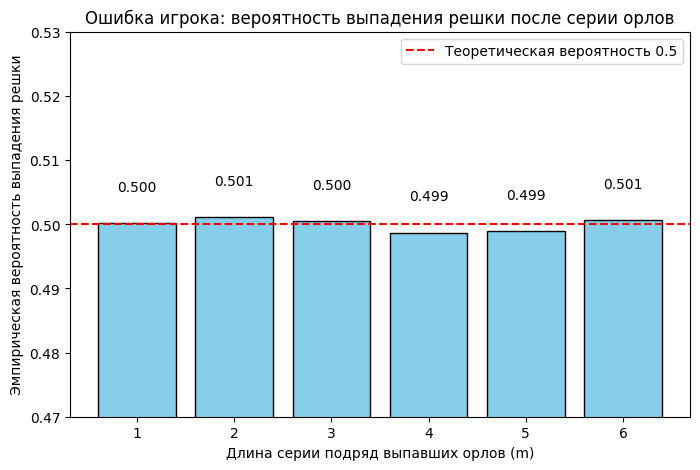

,m,count_cases,P(next=tail | prev m heads)
0,1,499811,0.500177
1,2,249817,0.501163
2,3,124618,0.500449
3,4,62253,0.498691
4,5,31208,0.498878
5,6,15639,0.500607


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ------------------------------
# Симуляция
# ------------------------------
np.random.seed(42)
N = 1_000_000   # количество бросков
max_m = 6       # проверяем серии длиной 1..6

flips = np.random.randint(0, 2, size=N)  # 0=решка, 1=орёл

results = []
for m in range(1, max_m + 1):
    # проверяем позиции, где предыдущие m бросков были орлы
    prev_all_heads = np.all([flips[i:N-m+i] == 1 for i in range(m)], axis=0)
    count_prev = prev_all_heads.sum()
    if count_prev == 0:
        prob_tail = np.nan
    else:
        next_values = flips[m:][prev_all_heads]
        prob_tail = np.mean(next_values == 0)
    results.append((m, count_prev, prob_tail))

df = pd.DataFrame(results, columns=["m", "count_cases", "P(next=tail | prev m heads)"])

# ------------------------------
# Визуализация
# ------------------------------
plt.figure(figsize=(8,5))
plt.bar(df["m"], df["P(next=tail | prev m heads)"], color="skyblue", edgecolor="black")
plt.axhline(0.5, color="red", linestyle="--", label="Теоретическая вероятность 0.5")

for idx, row in df.iterrows():
    plt.text(row["m"], row["P(next=tail | prev m heads)"]+0.005,
             f"{row['P(next=tail | prev m heads)']:.3f}", ha="center")

plt.xticks(df["m"])
plt.ylim(0.47, 0.53)
plt.xlabel("Длина серии подряд выпавших орлов (m)")
plt.ylabel("Эмпирическая вероятность выпадения решки")
plt.title("Ошибка игрока: вероятность выпадения решки после серии орлов")
plt.legend()
plt.show()

# Покажем таблицу
df
